### PCA

Training MSE: 0.04847438922588322
Testing MSE: 0.04843554182698907
Training RMSE: 0.22016900150993832
Testing RMSE: 0.2200807620556351
Training MAE: 0.18611532460683852
Testing MAE: 0.18677346574268314
Training MAPE: 0.6067654865263086
Testing MAPE: 1.121727364062235
Training R^2: 0.9521235764149183
Testing R^2: 0.9486911101509657
Explained variance ratio by PCA components: [0.66697617 0.23311461 0.0978587 ]
Number of components used: 3
PCA Components (Eigenvectors):
[[-1.96889213e-02 -1.59377134e-02  8.24445495e-03  4.08103411e-01
   4.08103411e-01  4.08103411e-01  4.08103411e-01  4.08103411e-01
   4.08103411e-01]
 [ 6.71491888e-01  6.71340669e-01 -3.12566367e-01  1.08214098e-02
   1.08214098e-02  1.08214098e-02  1.08214098e-02  1.08214098e-02
   1.08214098e-02]
 [ 2.19491844e-01  2.22696898e-01  9.49857579e-01  1.62454613e-05
   1.62454613e-05  1.62454613e-05  1.62454613e-05  1.62454613e-05
   1.62454613e-05]]
Coefficients: [ 0.03942203 -0.09761263  1.02699162]
Intercept: 0.001804889

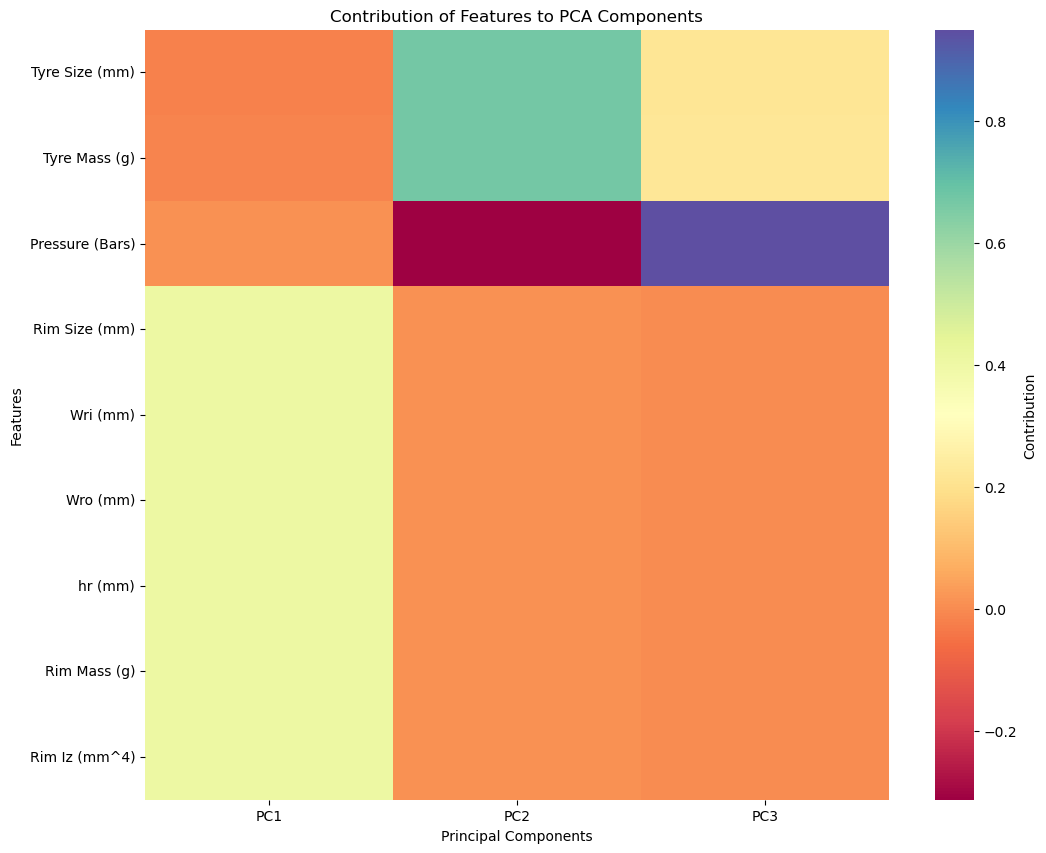

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Load the CSV file
df = pd.read_csv('tyre-rim.csv')

# Separate features and target variable
X = df.drop(columns='Energy (J)')
y = df['Energy (J)']

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
y_normalized = (y - y.mean()) / y.std()

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.99)  # Keep 99% of the variance
X_pca = pca.fit_transform(X_normalized)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_normalized, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")
print(f"Training MAE: {train_mae}")
print(f"Testing MAE: {test_mae}")
print(f"Training MAPE: {train_mape}")
print(f"Testing MAPE: {test_mape}")
print(f"Training R^2: {train_r2}")
print(f"Testing R^2: {test_r2}")

# Print the explained variance ratio of the PCA components
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")
print(f"Number of components used: {pca.n_components_}")

# Print the PCA components (eigenvectors)
print("PCA Components (Eigenvectors):")
print(pca.components_)

# Optionally, you can print the coefficients of the model
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Plotting the contribution of features to the components
plt.figure(figsize=(12, 10))
sns.heatmap(pca.components_.T,
            cmap='Spectral',
            yticklabels=X.columns,
            xticklabels=[f'PC{i+1}' for i in range(pca.n_components_)],
            cbar_kws={'label': 'Contribution'})
plt.title('Contribution of Features to PCA Components')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()


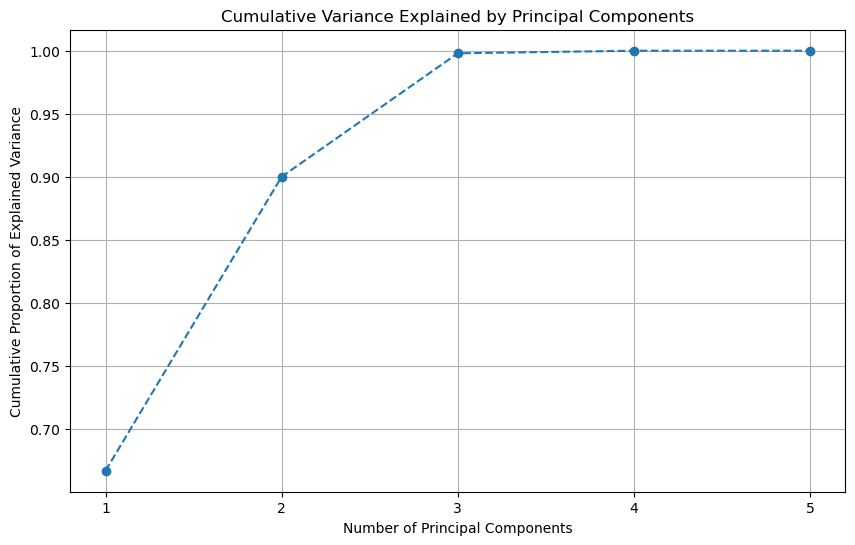

Explained variance ratio by PCA components: [6.66976172e-01 2.33114605e-01 9.78586992e-02 2.05052378e-03
 5.15769606e-32]
Number of components used: 5
PCA Components (Eigenvectors):
[[-1.96889213e-02 -1.59377134e-02  8.24445495e-03  4.08103411e-01
   4.08103411e-01  4.08103411e-01  4.08103411e-01  4.08103411e-01
   4.08103411e-01]
 [ 6.71491888e-01  6.71340669e-01 -3.12566367e-01  1.08214098e-02
   1.08214098e-02  1.08214098e-02  1.08214098e-02  1.08214098e-02
   1.08214098e-02]
 [ 2.19491844e-01  2.22696898e-01  9.49857579e-01  1.62454613e-05
   1.62454613e-05  1.62454613e-05  1.62454613e-05  1.62454613e-05
   1.62454613e-05]
 [ 7.07484502e-01 -7.06720445e-01  2.20798083e-03  1.08138245e-03
   1.08138245e-03  1.08138245e-03  1.08138245e-03  1.08138245e-03
   1.08138245e-03]
 [ 0.00000000e+00 -1.57587654e-17 -4.70801475e-16  2.32195394e-01
   2.32195394e-01 -9.03751857e-01  2.32195394e-01  9.97312533e-02
   1.07434421e-01]]


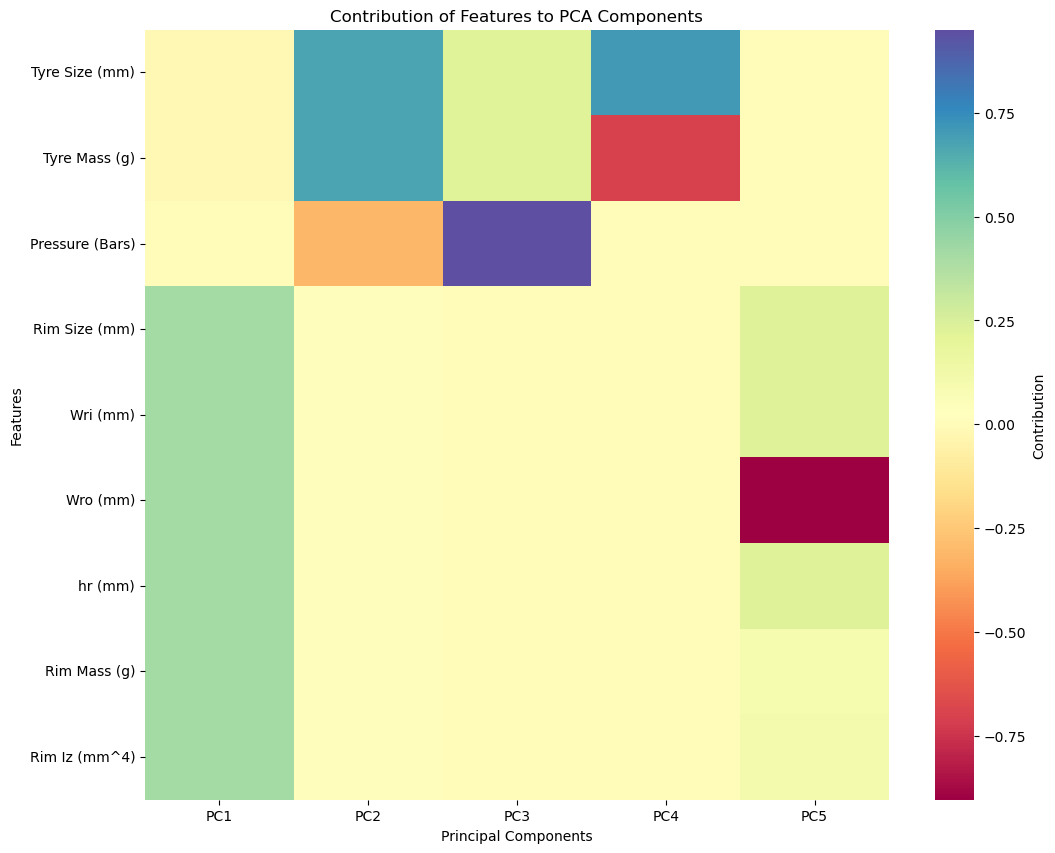

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Load the CSV file
df = pd.read_csv('tyre-rim.csv')

# Separate features and target variable
X = df.drop(columns='Energy (J)')
y = df['Energy (J)']

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
y_normalized = (y - y.mean()) / y.std()

# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Limit to 5 components
X_pca = pca.fit_transform(X_normalized)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Explained Variance')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

# Print the explained variance ratio of the PCA components
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")
print(f"Number of components used: {pca.n_components_}")

# Print the PCA components (eigenvectors)
print("PCA Components (Eigenvectors):")
print(pca.components_)

# Plotting the contribution of features to the components
plt.figure(figsize=(12, 10))
sns.heatmap(pca.components_.T,
            cmap='Spectral',
            yticklabels=X.columns,
            xticklabels=[f'PC{i+1}' for i in range(pca.n_components_)],
            cbar_kws={'label': 'Contribution'})
plt.title('Contribution of Features to PCA Components')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()


## 0.6 0.2 0.2 split - including cross validation, validation NO stacking, then testing

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('tyre-rim-3var.csv')

# Splitting the dataset into train, validation, and test sets
train_ratio = 0.6
validate_ratio = 0.2
test_ratio = 0.2

# Define independent and target variables
X = df[['Tyre Size (mm)', 'Pressure (Bars)', 'Rim Size (mm)']].values
y = df['Energy (J)'].values

# Scale the independent variables between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_ratio, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=validate_ratio/(train_ratio+validate_ratio), random_state=42)

# Define models
models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train models and perform hyperparameter tuning with cross-validation
best_models = {}
cv_results = {}
for name, model in models.items():
    params = {}
    if name == "Random Forest":
        params = {
            "n_estimators": [10, 50, 100],
            "max_depth": [None, 5, 10]
        }
    elif name == "Gradient Boosting":
        params = {
            "n_estimators": [10, 50, 100],
            "learning_rate": [0.01, 0.1, 1.0]
        }
    elif name == "Support Vector Machine":
        params = {
            "kernel": ['linear', 'rbf'],
            "C": [0.1, 1, 10]
        }
    
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Cross-validation predictions
    y_train_pred_cv = cross_val_predict(best_model, X_train, y_train, cv=5)
    rmse_cv = np.sqrt(mean_squared_error(y_train, y_train_pred_cv))
    mae_cv = mean_absolute_error(y_train, y_train_pred_cv)
    r2_cv = r2_score(y_train, y_train_pred_cv)
    n_cv = X_train.shape[0]
    p_cv = X_train.shape[1]
    adjusted_r2_cv = 1 - (1 - r2_cv) * (n_cv - 1) / (n_cv - p_cv - 1)
    cv_results[name] = {"RMSE": rmse_cv, "MAE": mae_cv, "R-squared": r2_cv, "Adjusted R-squared": adjusted_r2_cv}

# Validate the models
validate_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_validate)
    rmse = np.sqrt(mean_squared_error(y_validate, y_pred))
    mae = mean_absolute_error(y_validate, y_pred)
    r2 = r2_score(y_validate, y_pred)
    n = X_validate.shape[0]
    p = X_validate.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    validate_results[name] = {"RMSE": rmse, "MAE": mae, "R-squared": r2, "Adjusted R-squared": adjusted_r2}

# Test the models
test_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    test_results[name] = {"RMSE": rmse, "MAE": mae, "R-squared": r2, "Adjusted R-squared": adjusted_r2}

# Print cross-validation, validation, and test results
print("Cross-Validation Results:")
for name, metrics in cv_results.items():
    print(f"{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R-squared']}\n")

print("Validation Results:")
for name, metrics in validate_results.items():
    print(f"{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R-squared']}\n")

print("Test Results:")
for name, metrics in test_results.items():
    print(f"{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R-squared']}\n")


Cross-Validation Results:
Random Forest:
RMSE: 0.10928924328431279
MAE: 0.08061761179874015
R-squared: 0.9920340868540305
Adjusted R-squared: 0.9920187284096617

Gradient Boosting:
RMSE: 0.10911069661758878
MAE: 0.08055699758978212
R-squared: 0.9920600935386078
Adjusted R-squared: 0.9920447852356616

Support Vector Machine:
RMSE: 0.12058832161332812
MAE: 0.09163805439412197
R-squared: 0.9903017978990228
Adjusted R-squared: 0.9902830995659233

Validation Results:
Random Forest:
RMSE: 0.1092045848685323
MAE: 0.08020538283429868
R-squared: 0.9922142035666127
Adjusted R-squared: 0.9921841038381332

Gradient Boosting:
RMSE: 0.1090397895665446
MAE: 0.08004318719722611
R-squared: 0.9922376841663039
Adjusted R-squared: 0.9922076752133385

Support Vector Machine:
RMSE: 0.12024507124682553
MAE: 0.09166732605667548
R-squared: 0.9905603505209406
Adjusted R-squared: 0.9905238570306865

Test Results:
Random Forest:
RMSE: 0.10424116174085321
MAE: 0.07610183564668986
R-squared: 0.9925168319987964
Adju

## redone with more parameters explored

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('tyre-rim-3var.csv')

# Splitting the dataset into train, validation, and test sets
train_ratio = 0.6
validate_ratio = 0.2
test_ratio = 0.2

# Define independent and target variables
X = df[['Tyre Size (mm)', 'Pressure (Bars)', 'Rim Size (mm)']].values
y = df['Energy (J)'].values

# Scale the independent variables between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_ratio, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=validate_ratio/(train_ratio+validate_ratio), random_state=42)

# Define models
models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train models and perform hyperparameter tuning with cross-validation
best_models = {}
cv_results = {}
for name, model in models.items():
    params = {}
    if name == "Random Forest":
        params = {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 2, 4],
        }
    elif name == "Gradient Boosting":
        params = {
            "n_estimators": [10, 50, 100],
            "learning_rate": [0.01, 0.1, 1.0],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 10, 20],
            'min_samples_leaf': [1, 2, 4],
            'subsample': [0.8, 1.0],
        }
    elif name == "Support Vector Machine":
        params = {
            'C': [0.1, 1, 10, 100],
            'epsilon': [0.01, 0.1, 1],
            'kernel': ['linear', 'poly', 'sigmoid'],
            'gamma': ['scale', 'auto'],
        }
    
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Cross-validation predictions
    y_train_pred_cv = cross_val_predict(best_model, X_train, y_train, cv=5)
    rmse_cv = np.sqrt(mean_squared_error(y_train, y_train_pred_cv))
    mae_cv = mean_absolute_error(y_train, y_train_pred_cv)
    r2_cv = r2_score(y_train, y_train_pred_cv)
    n_cv = X_train.shape[0]
    p_cv = X_train.shape[1]
    adjusted_r2_cv = 1 - (1 - r2_cv) * (n_cv - 1) / (n_cv - p_cv - 1)
    cv_results[name] = {"RMSE": rmse_cv, "MAE": mae_cv, "R-squared": r2_cv, "Adjusted R-squared": adjusted_r2_cv}

# Validate the models
validate_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_validate)
    rmse = np.sqrt(mean_squared_error(y_validate, y_pred))
    mae = mean_absolute_error(y_validate, y_pred)
    r2 = r2_score(y_validate, y_pred)
    n = X_validate.shape[0]
    p = X_validate.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    validate_results[name] = {"RMSE": rmse, "MAE": mae, "R-squared": r2, "Adjusted R-squared": adjusted_r2}

# Test the models
test_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    test_results[name] = {"RMSE": rmse, "MAE": mae, "R-squared": r2, "Adjusted R-squared": adjusted_r2}

# Print cross-validation, validation, and test results
print("Cross-Validation Results:")
for name, metrics in cv_results.items():
    print(f"{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R-squared']}\n")

print("Validation Results:")
for name, metrics in validate_results.items():
    print(f"{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R-squared']}\n")

print("Test Results:")
for name, metrics in test_results.items():
    print(f"{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R-squared']}\n")


Cross-Validation Results:
Random Forest:
RMSE: 0.10595358174198778
MAE: 0.07878307511835428
R-squared: 0.9926053033834119
Adjusted R-squared: 0.9925934275323146

Gradient Boosting:
RMSE: 0.10657116643276603
MAE: 0.07928574284018637
R-squared: 0.9925188473895188
Adjusted R-squared: 0.9925068326904656

Support Vector Machine:
RMSE: 0.2850173895683348
MAE: 0.243517459348611
R-squared: 0.9464903892208548
Adjusted R-squared: 0.9464044530151068

Validation Results:
Random Forest:
RMSE: 0.114745666479133
MAE: 0.08240511846951036
R-squared: 0.9912705443326584
Adjusted R-squared: 0.9912283050310422

Gradient Boosting:
RMSE: 0.11507598068878941
MAE: 0.08282747054995278
R-squared: 0.9912202136561474
Adjusted R-squared: 0.9911777308189997

Support Vector Machine:
RMSE: 0.30212145673499335
MAE: 0.2589676303066784
R-squared: 0.939482954355159
Adjusted R-squared: 0.9391901299407486

Test Results:
Random Forest:
RMSE: 0.10347741208466707
MAE: 0.07502141151908863
R-squared: 0.9924260844614182
Adjusted 

## SVM changed to sigmoid (no real difference)

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('tyre-rim-3var.csv')

# Splitting the dataset into train, validation, and test sets
train_ratio = 0.6
validate_ratio = 0.2
test_ratio = 0.2

# Define independent and target variables
X = df[['Tyre Size (mm)', 'Pressure (Bars)', 'Rim Size (mm)']].values
y = df['Energy (J)'].values

# Scale the independent variables between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_ratio, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=validate_ratio/(train_ratio+validate_ratio), random_state=42)

# Define models
models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train models and perform hyperparameter tuning with cross-validation
best_models = {}
cv_results = {}
for name, model in models.items():
    params = {}
    if name == "Random Forest":
        params = {
            "n_estimators": [10, 50, 100],
            "max_depth": [None, 5, 10]
        }
    elif name == "Gradient Boosting":
        params = {
            "n_estimators": [10, 50, 100],
            "learning_rate": [0.01, 0.1, 1.0]
        }
    elif name == "Support Vector Machine":
        params = {
            "kernel": ['sigmoid', 'rbf'],
            "C": [0.1, 1, 10]
        }
    
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Cross-validation predictions
    y_train_pred_cv = cross_val_predict(best_model, X_train, y_train, cv=5)
    rmse_cv = np.sqrt(mean_squared_error(y_train, y_train_pred_cv))
    mae_cv = mean_absolute_error(y_train, y_train_pred_cv)
    r2_cv = r2_score(y_train, y_train_pred_cv)
    n_cv = X_train.shape[0]
    p_cv = X_train.shape[1]
    adjusted_r2_cv = 1 - (1 - r2_cv) * (n_cv - 1) / (n_cv - p_cv - 1)
    cv_results[name] = {"RMSE": rmse_cv, "MAE": mae_cv, "R-squared": r2_cv, "Adjusted R-squared": adjusted_r2_cv}

# Validate the models
validate_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_validate)
    rmse = np.sqrt(mean_squared_error(y_validate, y_pred))
    mae = mean_absolute_error(y_validate, y_pred)
    r2 = r2_score(y_validate, y_pred)
    n = X_validate.shape[0]
    p = X_validate.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    validate_results[name] = {"RMSE": rmse, "MAE": mae, "R-squared": r2, "Adjusted R-squared": adjusted_r2}

# Test the models
test_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    test_results[name] = {"RMSE": rmse, "MAE": mae, "R-squared": r2, "Adjusted R-squared": adjusted_r2}

# Print cross-validation, validation, and test results
print("Cross-Validation Results:")
for name, metrics in cv_results.items():
    print(f"{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R-squared']}\n")

print("Validation Results:")
for name, metrics in validate_results.items():
    print(f"{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R-squared']}\n")

print("Test Results:")
for name, metrics in test_results.items():
    print(f"{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R-squared']}\n")


Cross-Validation Results:
Random Forest:
RMSE: 0.10587028980626693
MAE: 0.0787687203590492
R-squared: 0.9926169250104118
Adjusted R-squared: 0.9926050678235977

Gradient Boosting:
RMSE: 0.10581665265068894
MAE: 0.07864316471739674
R-squared: 0.99262440410257
Adjusted R-squared: 0.9926125589271458

Support Vector Machine:
RMSE: 0.11986011445381956
MAE: 0.09110769089621466
R-squared: 0.9905367905630205
Adjusted R-squared: 0.9905215926891924

Validation Results:
Random Forest:
RMSE: 0.1152082945983838
MAE: 0.08271520437600831
R-squared: 0.9912000121214455
Adjusted R-squared: 0.9911574315349363

Gradient Boosting:
RMSE: 0.11499826190831676
MAE: 0.08249506985121147
R-squared: 0.9912320688471754
Adjusted R-squared: 0.9911896433738553

Support Vector Machine:
RMSE: 0.12215624476764377
MAE: 0.09189027297940133
R-squared: 0.9901065918732663
Adjusted R-squared: 0.9900587205436209

Test Results:
Random Forest:
RMSE: 0.10339091969084868
MAE: 0.07505020811993382
R-squared: 0.9924387406013996
Adjust

### WITH STACKING SIGMOID

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('tyre-rim-3var.csv')

# Splitting the dataset into train, validation, and test sets
train_ratio = 0.5
validate_ratio = 0.25
test_ratio = 0.25

# Define independent and target variables
X = df[['Tyre Size (mm)', 'Pressure (Bars)', 'Rim Size (mm)']].values
y = df['Energy (J)'].values

# Scale the independent variables between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create bins for stratification
num_bins = 10
y_binned = pd.qcut(y, num_bins, labels=False, duplicates='drop')

# Splitting the dataset into train, validation, and test sets with stratification
X_train, X_test, y_train, y_test, y_binned_train, y_binned_test = train_test_split(
    X_scaled, y, y_binned, test_size=test_ratio, random_state=42, stratify=y_binned)
X_train, X_validate, y_train, y_validate, y_binned_train, y_binned_validate = train_test_split(
    X_train, y_train, y_binned_train, test_size=validate_ratio/(train_ratio+validate_ratio), random_state=42, stratify=y_binned_train)

# Define models
base_models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train base models and perform hyperparameter tuning with cross-validation
best_models = {}
cv_results = {}
skf = StratifiedKFold(n_splits=5)

for name, model in base_models.items():
    params = {}
    if name == "Random Forest":
        params = {
            "n_estimators": [10, 50, 100],
            "max_depth": [None, 5, 10]
        }
    elif name == "Gradient Boosting":
        params = {
            "n_estimators": [10, 50, 100],
            "learning_rate": [0.01, 0.1, 1.0]
        }
    elif name == "Support Vector Machine":
        params = {
            "kernel": ['sigmoid', 'rbf'],
            "C": [0.1, 1, 10]
        }
    
    grid_search = GridSearchCV(model, params, cv=skf.split(X_train, y_binned_train), scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Cross-validation predictions
    y_train_pred_cv = cross_val_predict(best_model, X_train, y_train, cv=skf.split(X_train, y_binned_train))
    rmse_cv = np.sqrt(mean_squared_error(y_train, y_train_pred_cv))
    mae_cv = mean_absolute_error(y_train, y_train_pred_cv)
    r2_cv = r2_score(y_train, y_train_pred_cv)
    n_cv = X_train.shape[0]
    p_cv = X_train.shape[1]
    adjusted_r2_cv = 1 - (1 - r2_cv) * (n_cv - 1) / (n_cv - p_cv - 1)
    cv_results[name] = {"RMSE": rmse_cv, "MAE": mae_cv, "R-squared": r2_cv, "Adjusted R-squared": adjusted_r2_cv}

# Create a stacking model using the best models
estimators = [(name, model) for name, model in best_models.items()]
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=GradientBoostingRegressor()  # Meta-model
)

# Train the stacking model on the training set
stacking_model.fit(X_train, y_train)

# Validate the stacking model
y_validate_pred = stacking_model.predict(X_validate)
rmse_validate = np.sqrt(mean_squared_error(y_validate, y_validate_pred))
mae_validate = mean_absolute_error(y_validate, y_validate_pred)
r2_validate = r2_score(y_validate, y_validate_pred)
n_validate = X_validate.shape[0]
p_validate = X_validate.shape[1]
adjusted_r2_validate = 1 - (1 - r2_validate) * (n_validate - 1) / (n_validate - p_validate - 1)
validate_results = {"RMSE": rmse_validate, "MAE": mae_validate, "R-squared": r2_validate, "Adjusted R-squared": adjusted_r2_validate}

# Test the stacking model
y_test_pred = stacking_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)
test_results = {"RMSE": rmse_test, "MAE": mae_test, "R-squared": r2_test, "Adjusted R-squared": adjusted_r2_test}

# Print cross-validation, validation, and test results
print("Cross-Validation Results:")
for name, metrics in cv_results.items():
    print(f"{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R-squared']}\n")

print("Validation Results:")
print(f"Stacking Model:")
print(f"RMSE: {validate_results['RMSE']}")
print(f"MAE: {validate_results['MAE']}")
print(f"R-squared: {validate_results['R-squared']}")
print(f"Adjusted R-squared: {validate_results['Adjusted R-squared']}\n")

print("Test Results:")
print(f"Stacking Model:")
print(f"RMSE: {test_results['RMSE']}")
print(f"MAE: {test_results['MAE']}")
print(f"R-squared: {test_results['R-squared']}")
print(f"Adjusted R-squared: {test_results['Adjusted R-squared']}\n")


Cross-Validation Results:
Random Forest:
RMSE: 0.11021907525204824
MAE: 0.08130697382434725
R-squared: 0.9918442298488367
Adjusted R-squared: 0.9918285053562573

Gradient Boosting:
RMSE: 0.1101220373356498
MAE: 0.08104614422360536
R-squared: 0.9918585843615001
Adjusted R-squared: 0.9918428875447164

Support Vector Machine:
RMSE: 0.12255663909359858
MAE: 0.09257875840329523
R-squared: 0.9899161787798817
Adjusted R-squared: 0.98989673696519

Validation Results:
Stacking Model:
RMSE: 0.10722030939909775
MAE: 0.08059336202334196
R-squared: 0.9924722675096023
Adjusted R-squared: 0.9924431654510054

Test Results:
Stacking Model:
RMSE: 0.10445277896531958
MAE: 0.07445125135937998
R-squared: 0.9926385227439194
Adjusted R-squared: 0.9926100634246304



### Just focusing on the random forest, still has Hyper and Cross Validation (both validation), but no stacking

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('tyre-rim-3var.csv')

# Splitting the dataset into train, validation, and test sets
train_ratio = 0.6
validate_ratio = 0.2
test_ratio = 0.2

# Define independent and target variables
X = df[['Tyre Size (mm)', 'Pressure (Bars)', 'Rim Size (mm)']].values
y = df['Energy (J)'].values

# Scale the independent variables between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_ratio, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=validate_ratio/(train_ratio+validate_ratio), random_state=42)

# Define models
models = {
    "Random Forest": RandomForestRegressor(),
}

# Train models and perform hyperparameter tuning with cross-validation
best_models = {}
cv_results = {}
for name, model in models.items():
    params = {}
    if name == "Random Forest":
        params = {
            "n_estimators": [10, 50, 100],
            "max_depth": [None, 5, 10]
        }
    
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Print optimal parameters
    print(f"Optimal parameters for {name}: {grid_search.best_params_}")

    # Cross-validation predictions
    y_train_pred_cv = cross_val_predict(best_model, X_train, y_train, cv=5)
    rmse_cv = np.sqrt(mean_squared_error(y_train, y_train_pred_cv))
    mae_cv = mean_absolute_error(y_train, y_train_pred_cv)
    r2_cv = r2_score(y_train, y_train_pred_cv)
    n_cv = X_train.shape[0]
    p_cv = X_train.shape[1]
    adjusted_r2_cv = 1 - (1 - r2_cv) * (n_cv - 1) / (n_cv - p_cv - 1)
    cv_results[name] = {"RMSE": rmse_cv, "MAE": mae_cv, "R-squared": r2_cv, "Adjusted R-squared": adjusted_r2_cv}

# Validate the models
validate_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_validate)
    rmse = np.sqrt(mean_squared_error(y_validate, y_pred))
    mae = mean_absolute_error(y_validate, y_pred)
    r2 = r2_score(y_validate, y_pred)
    n = X_validate.shape[0]
    p = X_validate.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    validate_results[name] = {"RMSE": rmse, "MAE": mae, "R-squared": r2, "Adjusted R-squared": adjusted_r2}

# Test the models
test_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    test_results[name] = {"RMSE": rmse, "MAE": mae, "R-squared": r2, "Adjusted R-squared": adjusted_r2}

# Print cross-validation, validation, and test results
print("\nCross-Validation Results:")
for name, metrics in cv_results.items():
    print(f"{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R-squared']}\n")

print("Validation Results:")
for name, metrics in validate_results.items():
    print(f"{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R-squared']}\n")

print("Test Results:")
for name, metrics in test_results.items():
    print(f"{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R-squared']}\n")


Optimal parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}

Cross-Validation Results:
Random Forest:
RMSE: 0.10580792742609661
MAE: 0.0786628915770887
R-squared: 0.9926256203776254
Adjusted R-squared: 0.9926137771555338

Validation Results:
Random Forest:
RMSE: 0.11486518687583155
MAE: 0.08240646912036077
R-squared: 0.9912523494601555
Adjusted R-squared: 0.9912100221188337

Test Results:
Random Forest:
RMSE: 0.10329343376165341
MAE: 0.07491936464770986
R-squared: 0.9924529927019112
Adjusted R-squared: 0.9924164749246625



### Varying splitting ratios

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('tyre-rim-3var.csv')

# Splitting the dataset into train, validation, and test sets
train_ratio = 0.8
validate_ratio = 0.1
test_ratio = 0.1

# Define independent and target variables
X = df[['Tyre Size (mm)', 'Pressure (Bars)', 'Rim Size (mm)']].values
y = df['Energy (J)'].values

# Scale the independent variables between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_ratio, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=validate_ratio/(train_ratio+validate_ratio), random_state=42)

# Define models
models = {
    "Random Forest": RandomForestRegressor(),
}

# Train models and perform hyperparameter tuning with cross-validation
best_models = {}
cv_results = {}
for name, model in models.items():
    params = {}
    if name == "Random Forest":
        params = {
            "n_estimators": [10, 50, 100],
            "max_depth": [None, 5, 10]
        }
    
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Print optimal parameters
    print(f"Optimal parameters for {name}: {grid_search.best_params_}")

    # Cross-validation predictions
    y_train_pred_cv = cross_val_predict(best_model, X_train, y_train, cv=5)
    rmse_cv = np.sqrt(mean_squared_error(y_train, y_train_pred_cv))
    mae_cv = mean_absolute_error(y_train, y_train_pred_cv)
    r2_cv = r2_score(y_train, y_train_pred_cv)
    n_cv = X_train.shape[0]
    p_cv = X_train.shape[1]
    adjusted_r2_cv = 1 - (1 - r2_cv) * (n_cv - 1) / (n_cv - p_cv - 1)
    cv_results[name] = {"RMSE": rmse_cv, "MAE": mae_cv, "R-squared": r2_cv, "Adjusted R-squared": adjusted_r2_cv}

# Validate the models
validate_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_validate)
    rmse = np.sqrt(mean_squared_error(y_validate, y_pred))
    mae = mean_absolute_error(y_validate, y_pred)
    r2 = r2_score(y_validate, y_pred)
    n = X_validate.shape[0]
    p = X_validate.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    validate_results[name] = {"RMSE": rmse, "MAE": mae, "R-squared": r2, "Adjusted R-squared": adjusted_r2}

# Test the models
test_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    test_results[name] = {"RMSE": rmse, "MAE": mae, "R-squared": r2, "Adjusted R-squared": adjusted_r2}

# Print cross-validation, validation, and test results
print("\nCross-Validation Results:")
for name, metrics in cv_results.items():
    print(f"{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R-squared']}\n")

print("Validation Results:")
for name, metrics in validate_results.items():
    print(f"{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R-squared']}\n")

print("Test Results:")
for name, metrics in test_results.items():
    print(f"{name}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Adjusted R-squared: {metrics['Adjusted R-squared']}\n")


Optimal parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}

Cross-Validation Results:
Random Forest:
RMSE: 0.10660427283045108
MAE: 0.07818665747106802
R-squared: 0.9925012509195092
Adjusted R-squared: 0.9924922235329757

Validation Results:
Random Forest:
RMSE: 0.10838843944276849
MAE: 0.0769398880996257
R-squared: 0.9916162531740305
Adjusted R-squared: 0.9915345933023489

Test Results:
Random Forest:
RMSE: 0.10868466360641091
MAE: 0.0809007304740923
R-squared: 0.9918228470103538
Adjusted R-squared: 0.9917431994162988



### Test for constant variance (homoscedasticity)

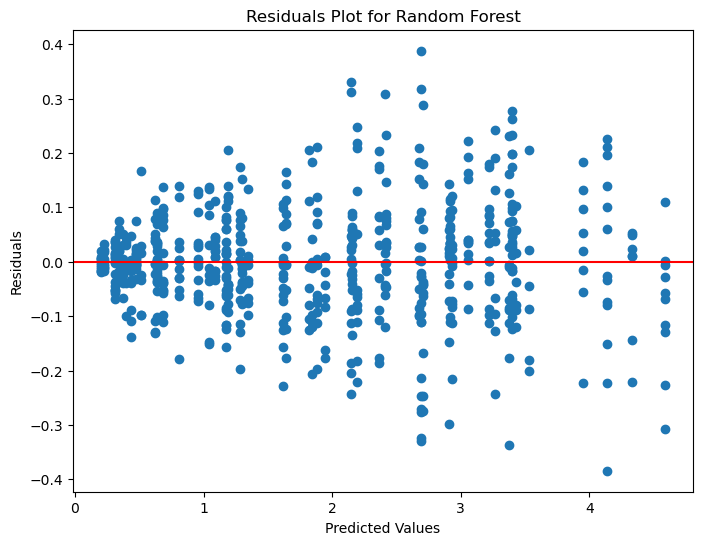

The residuals in the Random Forest model violate the constant variance assumption (Breusch-Pagan test p-value = 2.177104486327853e-14).


In [25]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Plot residuals vs predicted values
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals)
    plt.title(f"Residuals Plot for {name}")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color='r', linestyle='-')
    plt.show()

    # Breusch-Pagan test
    exog = sm.add_constant(y_pred)
    _, p_value, _, _ = het_breuschpagan(residuals, exog)
    
    if p_value < 0.05:
        print(f"The residuals in the {name} model violate the constant variance assumption (Breusch-Pagan test p-value = {p_value}).")
    else:
        print(f"The residuals in the {name} model satisfy the constant variance assumption (Breusch-Pagan test p-value = {p_value}).")


### Just simple random forest (no hyperparameterisation or cross validation)

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('tyre-rim-3var.csv')

# Define independent and target variables
X = df[['Tyre Size (mm)', 'Pressure (Bars)', 'Rim Size (mm)']].values
y = df['Energy (J)'].values

# Scale the independent variables between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the train set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics for train set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate evaluation metrics for test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Print evaluation metrics for train set
print("Train Results:")
print(f"RMSE: {train_rmse}")
print(f"MAE: {train_mae}")
print(f"R-squared: {train_r2}")
print(f"Adjusted R-squared: {adjusted_r2_train}")

# Print evaluation metrics for test set
print("\nTest Results:")
print(f"RMSE: {test_rmse}")
print(f"MAE: {test_mae}")
print(f"R-squared: {test_r2}")
print(f"Adjusted R-squared: {adjusted_r2_test}")


Train Results:
RMSE: 0.10572822488000576
MAE: 0.07774666202438651
R-squared: 0.9926278846654997
Adjusted R-squared: 0.992619009727296

Test Results:
RMSE: 0.10321856924665902
MAE: 0.07487574182403148
R-squared: 0.9924639285043215
Adjusted R-squared: 0.9924274636422457


### As above with log transformation of Energy to try to improve constant variance assumption

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('tyre-rim-3var.csv')

# Apply log transformation to the target variable
df['Log_Energy'] = np.log1p(df['Energy (J)'])  # Log transformation

# Define independent and target variables
X = df[['Tyre Size (mm)', 'Pressure (Bars)', 'Rim Size (mm)']].values
y = df['Log_Energy'].values  # Use log-transformed target variable

# Scale the independent variables between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the train set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Convert predictions back to original scale (inverse log transformation)
y_train_pred_orig = np.expm1(y_train_pred)
y_test_pred_orig = np.expm1(y_test_pred)

# Calculate evaluation metrics for train set
train_rmse = np.sqrt(mean_squared_error(np.expm1(y_train), y_train_pred_orig))
train_mae = mean_absolute_error(np.expm1(y_train), y_train_pred_orig)
train_r2 = r2_score(np.expm1(y_train), y_train_pred_orig)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate evaluation metrics for test set
test_rmse = np.sqrt(mean_squared_error(np.expm1(y_test), y_test_pred_orig))
test_mae = mean_absolute_error(np.expm1(y_test), y_test_pred_orig)
test_r2 = r2_score(np.expm1(y_test), y_test_pred_orig)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Print evaluation metrics for train set
print("Train Results:")
print(f"RMSE: {train_rmse}")
print(f"MAE: {train_mae}")
print(f"R-squared: {train_r2}")
print(f"Adjusted R-squared: {adjusted_r2_train}")

# Print evaluation metrics for test set
print("\nTest Results:")
print(f"RMSE: {test_rmse}")
print(f"MAE: {test_mae}")
print(f"R-squared: {test_r2}")
print(f"Adjusted R-squared: {adjusted_r2_test}")


Train Results:
RMSE: 0.10574673444175546
MAE: 0.07773166675662593
R-squared: 0.9926253032059407
Adjusted R-squared: 0.9926164251600409

Test Results:
RMSE: 0.10311126844488709
MAE: 0.07473256978157405
R-squared: 0.9924795885975778
Adjusted R-squared: 0.9924431995101467


### Again assessing constant variance

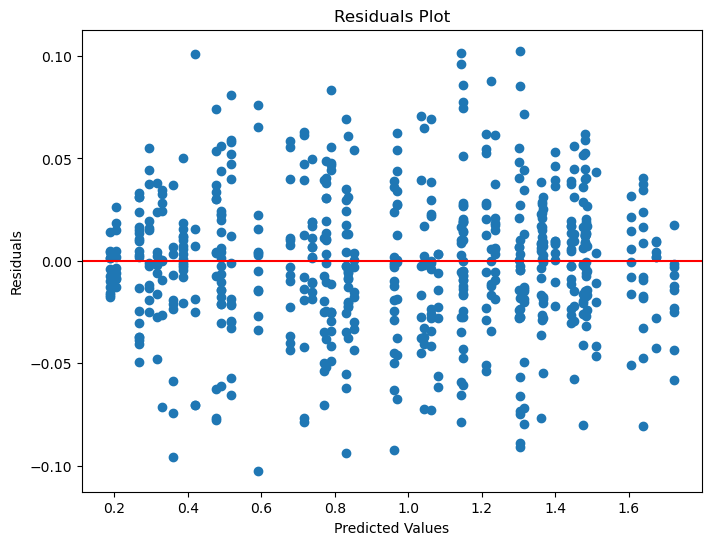

The residuals satisfy the constant variance assumption (Breusch-Pagan test p-value = 0.817631093157427).


In [42]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Plot residuals vs predicted values
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals)
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Breusch-Pagan test
exog = sm.add_constant(y_test_pred)
_, p_value, _, _ = het_breuschpagan(residuals, exog)

if p_value < 0.05:
    print(f"The residuals violate the constant variance assumption (Breusch-Pagan test p-value = {p_value}).")
else:
    print(f"The residuals satisfy the constant variance assumption (Breusch-Pagan test p-value = {p_value}).")


### Testing for independence of residuals

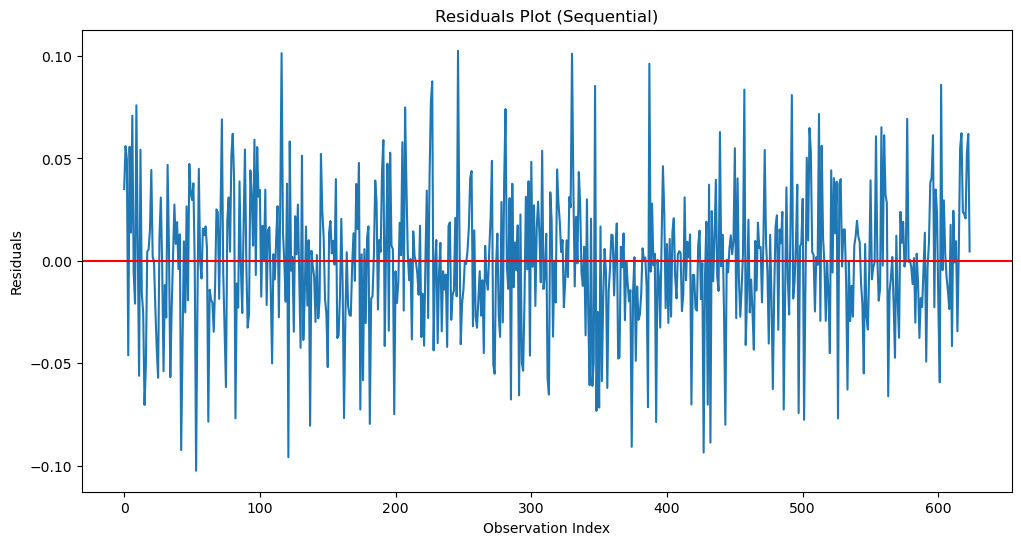

Durbin-Watson Statistic: 2.008108347576137
Ljung-Box Test (Autocorrelation) p-value at lag 1: l


In [43]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox

# Plot residuals sequentially
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title("Residuals Plot (Sequential)")
plt.xlabel("Observation Index")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Durbin-Watson Test
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {durbin_watson_statistic}")

# Ljung-Box Test (for autocorrelation)
lb_test_statistic, lb_p_value = acorr_ljungbox(residuals, lags=[1])
print(f"Ljung-Box Test (Autocorrelation) p-value at lag 1: {lb_p_value[0]}")


### TESTING FOR NORMALITY IN RESIDUALS

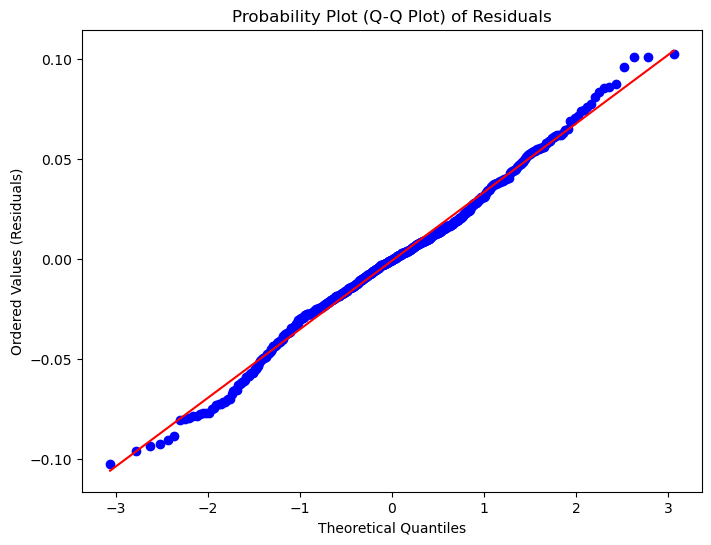

Kolmogorov-Smirnov Test for Normality:
KS Statistic: 0.4601962828056306
P-value: 1.9892123625785826e-121
The residuals are not normally distributed (significant p-value).


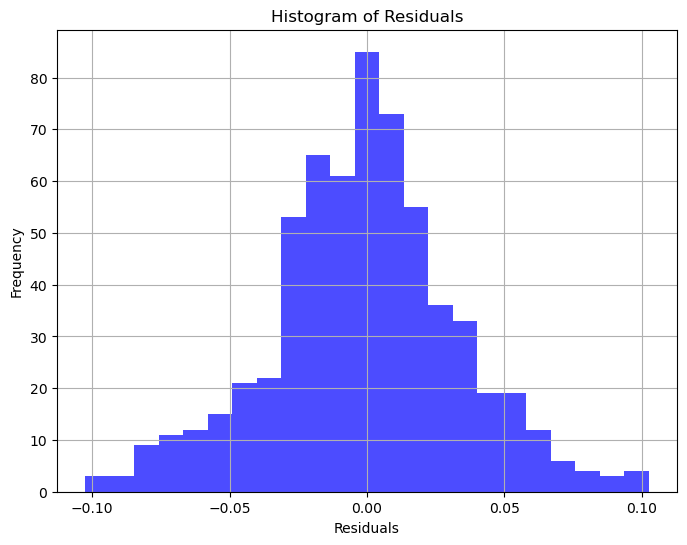

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Perform probability plot (Q-Q plot)
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.get_lines()[1].set_color('r')  # Set color for the line representing the normal distribution
plt.title("Probability Plot (Q-Q Plot) of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values (Residuals)")
plt.show()

# Perform Kolmogorov-Smirnov test for normality
ks_statistic, ks_p_value = stats.kstest(residuals, 'norm')
print(f"Kolmogorov-Smirnov Test for Normality:")
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")

# Interpret Kolmogorov-Smirnov test outcome
if ks_p_value < 0.05:
    print("The residuals are not normally distributed (significant p-value).")
else:
    print("The residuals are normally distributed (non-significant p-value).")

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins='auto', color='blue', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### including bootstrapping to try improve normality

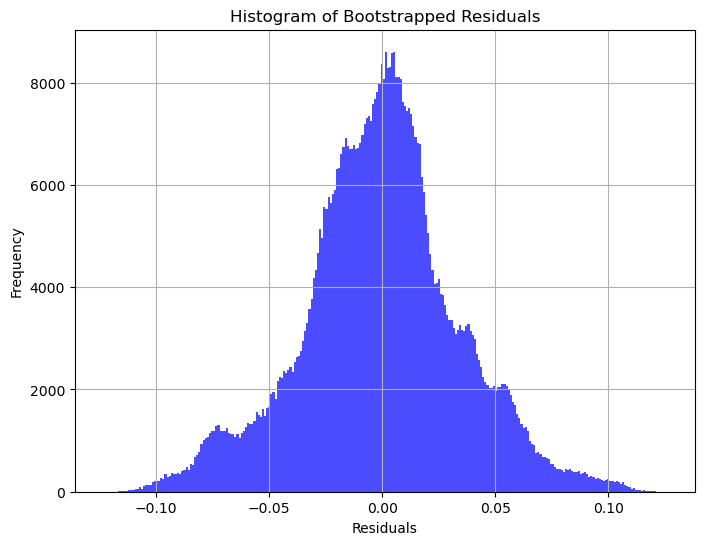

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.utils import resample

# Define the number of bootstrap samples
n_bootstraps = 1000

# Perform bootstrapping
bootstrap_results = []
for _ in range(n_bootstraps):
    # Resample with replacement from the original data
    X_resampled, y_resampled = resample(X_train, y_train, random_state=np.random.randint(1000))
    
    # Fit the model to the bootstrapped sample
    model = RandomForestRegressor(random_state=42)
    model.fit(X_resampled, y_resampled)
    
    # Predict on the test set
    y_test_pred_boot = model.predict(X_test)
    
    # Calculate residuals
    residuals_boot = y_test - y_test_pred_boot
    
    # Store residuals
    bootstrap_results.extend(residuals_boot)  # Extend instead of append

# Plot histogram of bootstrapped residuals
plt.figure(figsize=(8, 6))
plt.hist(bootstrap_results, bins='auto', color='blue', alpha=0.7)
plt.title("Histogram of Bootstrapped Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Kolmogorov-Smirnov Test for Normality:
KS Statistic: 0.4580889742613936
P-value: 0.0
The residuals are not normally distributed (significant p-value).


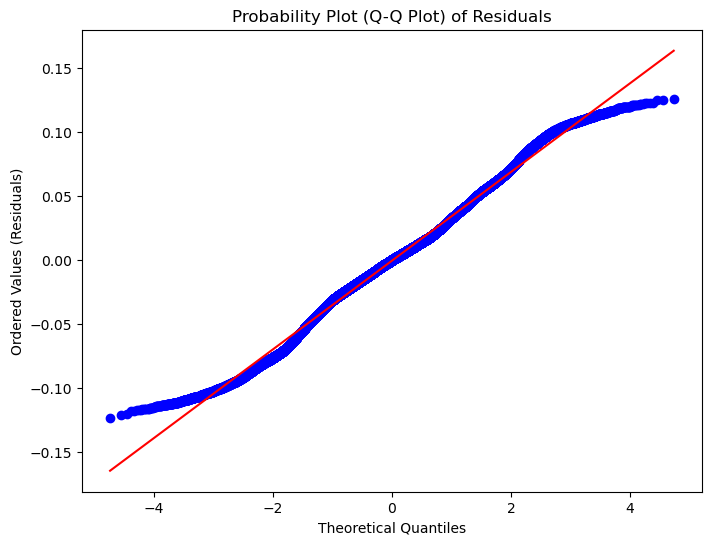

In [53]:
# Perform Kolmogorov-Smirnov test for normality
ks_statistic, ks_p_value = stats.kstest(bootstrap_results, 'norm')
print(f"Kolmogorov-Smirnov Test for Normality:")
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")

# Interpret Kolmogorov-Smirnov test outcome
if ks_p_value < 0.05:
    print("The residuals are not normally distributed (significant p-value).")
else:
    print("The residuals are normally distributed (non-significant p-value).")
    
# Perform probability plot (Q-Q plot)
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(bootstrap_results, dist="norm", plot=ax) #residuals_boot
ax.get_lines()[1].set_color('r')  # Set color for the line representing the normal distribution
plt.title("Probability Plot (Q-Q Plot) of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values (Residuals)")
plt.show()

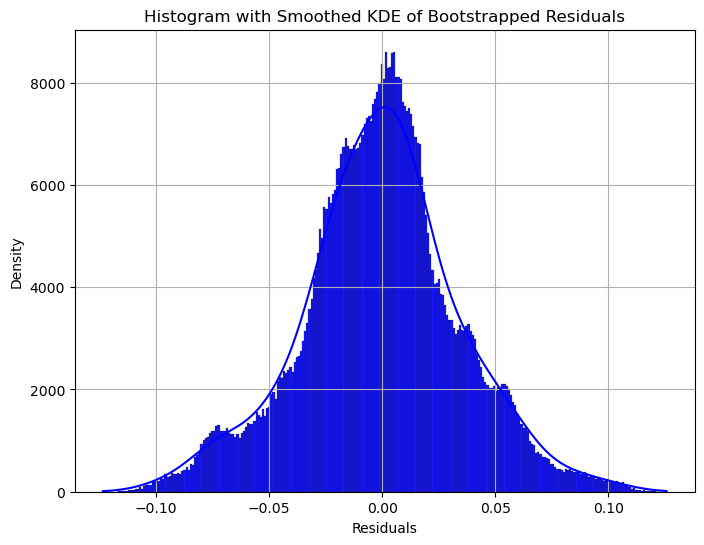

In [61]:
import seaborn as sns

# Plot histogram of bootstrapped residuals with smoothed KDE curve
plt.figure(figsize=(8, 6))
sns.histplot(bootstrap_results, bins='auto', kde=True, kde_kws={'bw_adjust': 4}, color='blue', alpha=0.9)
plt.title("Histogram with Smoothed KDE of Bootstrapped Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.grid(True)
plt.show()


### Plotting the feature importance of the random forest model

Feature Importances:
           Feature  Importance
1  Pressure (Bars)    0.923165
0   Tyre Size (mm)    0.072733
2    Rim Size (mm)    0.004101


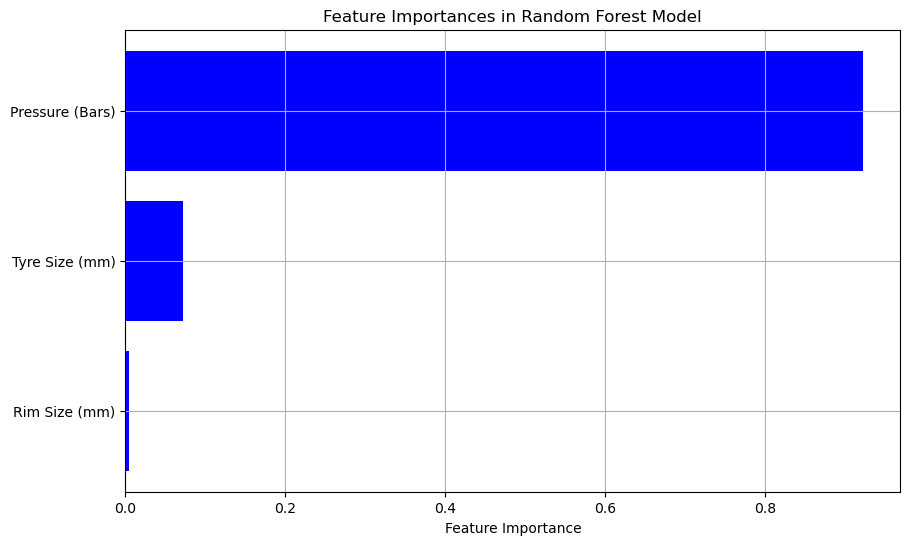

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('tyre-rim-3var.csv')

# Apply log transformation to the target variable
df['Log_Energy'] = np.log1p(df['Energy (J)'])

# Define independent and target variables
X = df[['Tyre Size (mm)', 'Pressure (Bars)', 'Rim Size (mm)']].values
y = df['Log_Energy'].values

# Scale the independent variables between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_
features = ['Tyre Size (mm)', 'Pressure (Bars)', 'Rim Size (mm)']

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Output the numerical values for the importance
print("Feature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.grid(True)
plt.show()


### Predicted vs actual for bootstrapped data


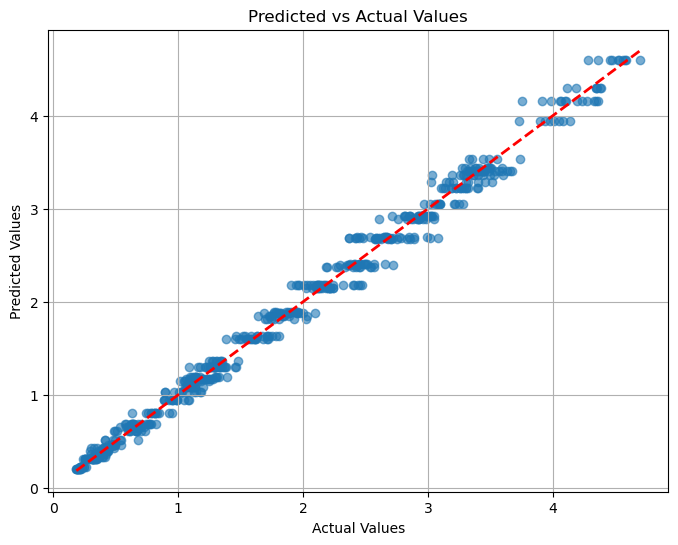

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('tyre-rim-3var.csv')

# Apply log transformation to the target variable
df['Log_Energy'] = np.log1p(df['Energy (J)'])

# Define independent and target variables
X = df[['Tyre Size (mm)', 'Pressure (Bars)', 'Rim Size (mm)']].values
y = df['Log_Energy'].values

# Scale the independent variables between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Resample (bootstrap) the dataset
n_bootstrap_samples = 1000
bootstrap_predictions = []
for _ in range(n_bootstrap_samples):
    # Resample the training data with replacement
    X_resampled, y_resampled = resample(X_train, y_train, replace=True, random_state=42)
    
    # Train a new model on the resampled data
    model_resampled = RandomForestRegressor(random_state=42)
    model_resampled.fit(X_resampled, y_resampled)
    
    # Make predictions on the test set using the resampled model
    y_test_pred_resampled = model_resampled.predict(X_test)
    bootstrap_predictions.append(y_test_pred_resampled)

# Convert bootstrap predictions to a numpy array
bootstrap_predictions = np.array(bootstrap_predictions)

# Calculate the mean prediction for each test observation
y_test_pred_mean = np.mean(bootstrap_predictions, axis=0)

# Convert predictions back to original scale (inverse log transformation)
y_test_orig = np.expm1(y_test)
y_test_pred_mean_orig = np.expm1(y_test_pred_mean)

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_orig, y_test_pred_mean_orig, alpha=0.6)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--', linewidth=2)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


### nonlinear fitting with sigmoid

Mean Squared Error (MSE): 0.19
Root Mean Squared Error (RMSE): 0.44
R-squared (R²): 0.8707
Adjusted R-squared: 0.8706


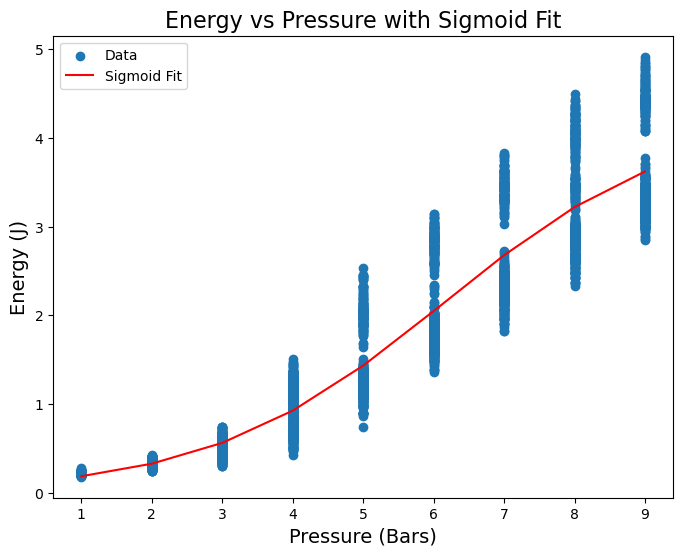

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv('tyre-rim.csv')

# Extract the Energy and Pressure columns
energy = data['Energy (J)'].values
pressure = data['Pressure (Bars)'].values

# Define the sigmoid function
def sigmoid(x, a, b, c):
    return c / (1 + np.exp(-a * (x - b)))

# Fit the sigmoid function to the data
popt, _ = curve_fit(sigmoid, pressure, energy, bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))

# Generate predictions using the fitted sigmoid function
energy_pred = sigmoid(pressure, *popt)

# Plot the data and the fitted sigmoid curve
plt.figure(figsize=(8, 6))
plt.scatter(pressure, energy, label='Data')
pressure_sorted = np.sort(pressure)
energy_pred_sorted = sigmoid(pressure_sorted, *popt)
plt.plot(pressure_sorted, energy_pred_sorted, 'r', label='Sigmoid Fit')
plt.xlabel('Pressure (Bars)', fontsize=14)
plt.ylabel('Energy (J)', fontsize=14)
plt.title('Energy vs Pressure with Sigmoid Fit', fontsize=16)
plt.legend()

# Calculate accuracy metrics
mse = mean_squared_error(energy, energy_pred)
rmse = np.sqrt(mse)
r2 = r2_score(energy, energy_pred)

# Adjusted R-squared calculation
n = len(energy)  # Number of data points
p = 1  # Number of predictors (pressure)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Adjusted R-squared: {adjusted_r2:.4f}")

plt.show()


### As above but including linear contributions for Tyre Size and Rim Size too

Mean Absolute Error (MAE): 0.21
Root Mean Squared Error (RMSE): 0.27
Adjusted R-squared: 0.9529


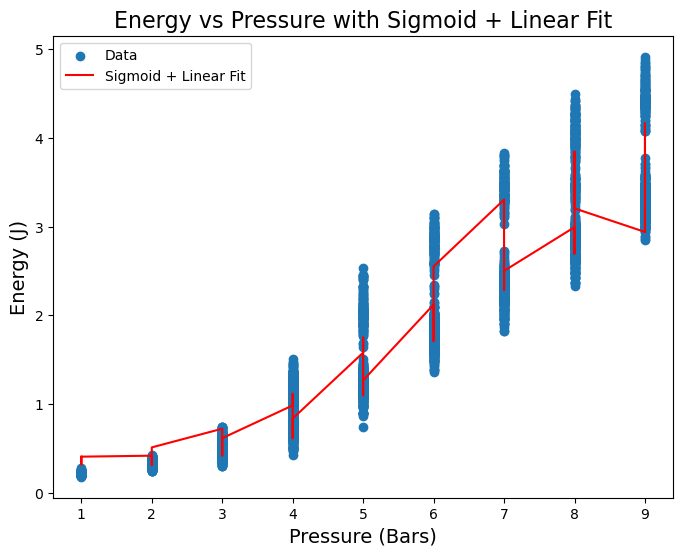

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('tyre-rim-3var.csv')

# Extract the relevant columns
tyre_size = data['Tyre Size (mm)'].values
pressure = data['Pressure (Bars)'].values
rim_size = data['Rim Size (mm)'].values
energy = data['Energy (J)'].values

# Log transform the energy data
log_energy = np.log1p(energy)

# Scale the independent variables
scaler = MinMaxScaler()
features = np.column_stack((tyre_size, pressure, rim_size))
features_scaled = scaler.fit_transform(features)

# Define the combined model function (sigmoid for pressure, linear for others)
def combined_model(X, a, b, c, d, e):
    tyre_size_scaled, pressure_scaled, rim_size_scaled = X
    return d * tyre_size_scaled + e * rim_size_scaled + c / (1 + np.exp(-a * (pressure_scaled - b)))

# Prepare the data for curve fitting
X_data = [features_scaled[:, 0], features_scaled[:, 1], features_scaled[:, 2]]

# Fit the combined model to the data
popt, _ = curve_fit(combined_model, X_data, log_energy, bounds=([0, 0, 0, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf]))

# Generate predictions using the fitted combined model
log_energy_pred = combined_model(X_data, *popt)

# Inverse log transform the predictions to original scale
energy_pred = np.expm1(log_energy_pred)

# Plot the data and the fitted sigmoid curve
plt.figure(figsize=(8, 6))
plt.scatter(pressure, energy, label='Data')
pressure_sorted_idx = np.argsort(features_scaled[:, 1])
pressure_sorted = pressure[pressure_sorted_idx]
X_data_sorted = [features_scaled[pressure_sorted_idx, 0], features_scaled[pressure_sorted_idx, 1], features_scaled[pressure_sorted_idx, 2]]
log_energy_pred_sorted = combined_model(X_data_sorted, *popt)
energy_pred_sorted = np.expm1(log_energy_pred_sorted)
plt.plot(pressure_sorted, energy_pred_sorted, 'r', label='Sigmoid + Linear Fit')
plt.xlabel('Pressure (Bars)', fontsize=14)
plt.ylabel('Energy (J)', fontsize=14)
plt.title('Energy vs Pressure with Sigmoid + Linear Fit', fontsize=16)
plt.legend()

# Calculate accuracy metrics
mae = mean_absolute_error(energy, energy_pred)
rmse = np.sqrt(mean_squared_error(energy, energy_pred))
r2 = r2_score(energy, energy_pred)

# Adjusted R-squared calculation
n = len(energy)  # Number of data points
p = 3  # Number of predictors (tyre size, pressure, rim size)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Adjusted R-squared: {adjusted_r2:.4f}")

plt.show()


### plotting actual vs predicted

Mean Absolute Error (MAE): 0.21
Root Mean Squared Error (RMSE): 0.27
Adjusted R-squared: 0.9529


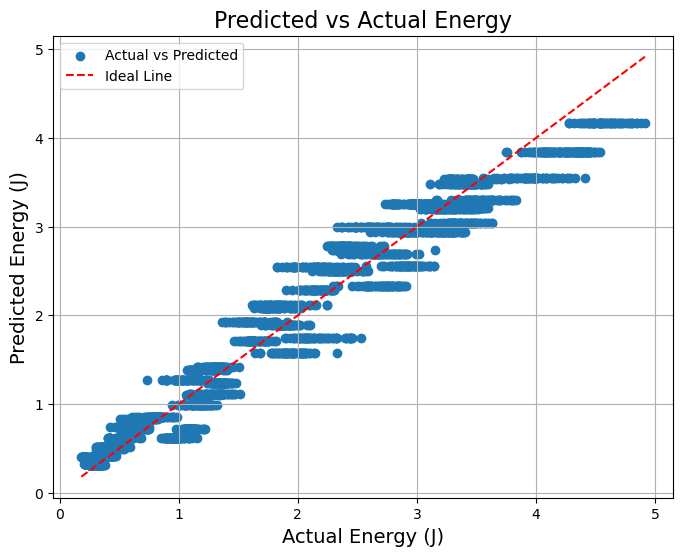

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('tyre-rim-3var.csv')

# Extract the relevant columns
tyre_size = data['Tyre Size (mm)'].values
pressure = data['Pressure (Bars)'].values
rim_size = data['Rim Size (mm)'].values
energy = data['Energy (J)'].values

# Log transform the energy data
log_energy = np.log1p(energy)

# Scale the independent variables
scaler = MinMaxScaler()
features = np.column_stack((tyre_size, pressure, rim_size))
features_scaled = scaler.fit_transform(features)

# Define the combined model function (sigmoid for pressure, linear for others)
def combined_model(X, a, b, c, d, e):
    tyre_size_scaled, pressure_scaled, rim_size_scaled = X
    return d * tyre_size_scaled + e * rim_size_scaled + c / (1 + np.exp(-a * (pressure_scaled - b)))

# Prepare the data for curve fitting
X_data = [features_scaled[:, 0], features_scaled[:, 1], features_scaled[:, 2]]

# Fit the combined model to the data
popt, _ = curve_fit(combined_model, X_data, log_energy, bounds=([0, 0, 0, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf]))

# Generate predictions using the fitted combined model
log_energy_pred = combined_model(X_data, *popt)

# Inverse log transform the predictions to original scale
energy_pred = np.expm1(log_energy_pred)

# Plot the data and the fitted sigmoid curve
plt.figure(figsize=(8, 6))
plt.scatter(energy, energy_pred, label='Actual vs Predicted')
plt.plot([min(energy), max(energy)], [min(energy), max(energy)], 'r--', label='Ideal Line')
plt.xlabel('Actual Energy (J)', fontsize=14)
plt.ylabel('Predicted Energy (J)', fontsize=14)
plt.title('Predicted vs Actual Energy', fontsize=16)
plt.legend()
plt.grid(True)

# Calculate accuracy metrics
mae = mean_absolute_error(energy, energy_pred)
rmse = np.sqrt(mean_squared_error(energy, energy_pred))
r2 = r2_score(energy, energy_pred)

# Adjusted R-squared calculation
n = len(energy)  # Number of data points
p = 3  # Number of predictors (tyre size, pressure, rim size)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Adjusted R-squared: {adjusted_r2:.4f}")

plt.show()


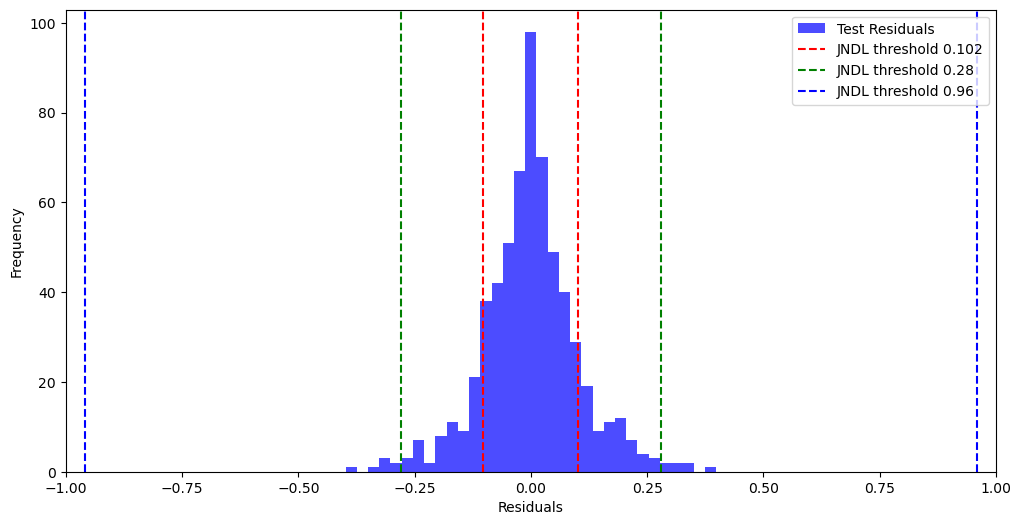

In [90]:
# Plot histogram of residuals for test set
plt.figure(figsize=(12, 6))
plt.hist(test_residuals, bins='auto', alpha=0.7, color='blue', label='Test Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Plot vertical lines for each JNDL threshold in different colors
colors = ['red', 'green', 'blue']
for threshold, color in zip(JNDL_thresholds, colors):
    plt.axvline(x=threshold, color=color, linestyle='--', label=f'JNDL threshold {threshold}')
    plt.axvline(x=-threshold, color=color, linestyle='--')

plt.xlim(-1, 1)
plt.legend()
plt.show()


In [93]:
import pandas as pd

# Load the dataset
df = pd.read_csv('tyre-rim-3var.csv')

# Group by test conditions and calculate statistics
grouped_stats = df.groupby(['Pressure (Bars)', 'Rim Size (mm)', 'Tyre Size (mm)'])['Energy (J)'].agg(['mean', 'min', 'max'])

# Calculate variation from the mean
grouped_stats['Mean Variation'] = grouped_stats['mean'] - df['Energy (J)'].mean()

# Calculate range for each group
grouped_stats['Range'] = grouped_stats['max'] - grouped_stats['min']

# Calculate overall statistics for ranges
overall_range_stats = grouped_stats['Range'].agg(['min', 'max', 'mean'])

# Print the results
print("Grouped Statistics with Range:")
print(grouped_stats)
print("\nOverall Statistics for Range:")
print(overall_range_stats)


Grouped Statistics with Range:
                                                  mean     min     max  \
Pressure (Bars) Rim Size (mm) Tyre Size (mm)                             
1               19            28              0.228725  0.2001  0.2778   
                23            28              0.205767  0.1800  0.2350   
2               19            25              0.303465  0.2418  0.3777   
                              28              0.345020  0.2711  0.4179   
                23            28              0.368933  0.3060  0.4230   
3               19            23              0.393740  0.2960  0.4704   
                              25              0.427888  0.3017  0.5423   
                              28              0.521003  0.4051  0.6820   
                23            23              0.473913  0.3966  0.5902   
                              28              0.634350  0.5020  0.7460   
4               19            20              0.969393  0.8470  1.1525   
       